## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

I would use both diagnostic approach and predictive approach. After we train a regression model, we can view the coefficients and determine the factors that affect wine quality the most, so regression model makes our data interpretable. Given new data that describe the features of wines, we can use out trained model to predict the quality, this is the predictive aspect of our analysis.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Fistly, we need a respons variable that indicates the quality of red wine. This response variable could be either ordinal categorical or continuous. Then we need variables that describe the features of wines, such as variable denoting the alcohol level.

### Data Collection

**Q3. From where do we get our data?**

We read our data from the csv file "winequality-red.csv" using pd.read_csv to dataframe format. 

In [264]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable
import torch
import torch.nn as nn
import seaborn as sn
import missingno as msno
import warnings
warnings.simplefilter("ignore")
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#import data
wine = pd.read_csv('winequality-red.csv')

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

From Portuguese "Vinho Verde" wine.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

If we can predict the quality of a wine given its features, then distributors can determine whether the wine would be preferred by consumers, then they could set the price of the wine accordingly.
If we figure out what features impact the wine quality most, producers can try and control these key features during brewing wine, thus improving the overall wine quality.

We have 1599 obversations and 12 features for each variables.


In [134]:
print("---------------Shape of data---------------")
print(wine.shape)

print("\n-----------Datatypes of features-----------")
print(wine.dtypes)

---------------Shape of data---------------
(1599, 12)

-----------Datatypes of features-----------
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Below we plot a scatter plot of wine quality based on alcohol level and citric acid level. We also display the first ten lines of the dataset.

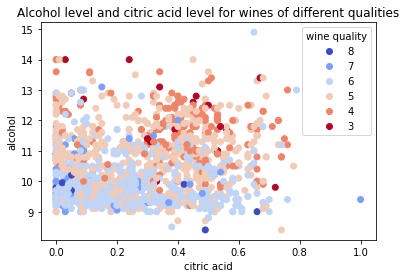

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [136]:
#plot a scatter plot
scatter = plt.scatter(x=wine['citric acid'], y=wine['alcohol'], 
            c=wine.quality, cmap = 'coolwarm')
plt.legend(handles= scatter.legend_elements()[0], title="wine quality",
          labels = [8, 7, 6, 5, 4, 3])

xlabel=np.random.randint(10, size=(5))  
ylabel=np.random.randint(10, size=(5))

plt.title('Alcohol level and citric acid level for wines of different qualities')
plt.xlabel("citric acid")
plt.ylabel("alcohol") 
plt.show()

#View the top ten lines of dataset
wine.head(10)

### Data Preparation

#### Explore the dataset further

There are no missing values in the dataset based on the graph below.

<AxesSubplot:>

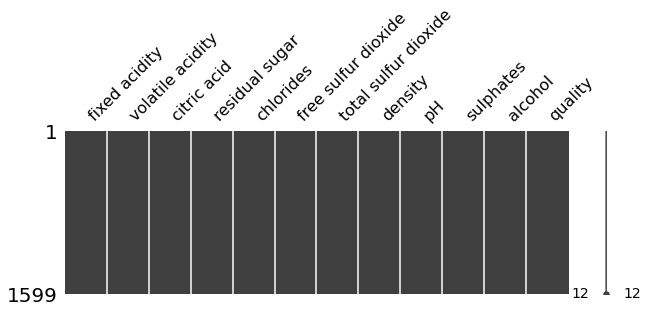

In [292]:
#Check missing values
msno.matrix(wine,figsize=(10,3))

Based on the boxplot, we notice that variables fixed acidity, free residual sugar, sulfur dioxide and total sulfur dioxide appears to have many outliers. Therefore we apply log transformations to these variables and plot the boxplot again. We notice that the number of outliers decreases after transformation, indicating the log transformation is suitable.

<AxesSubplot:>

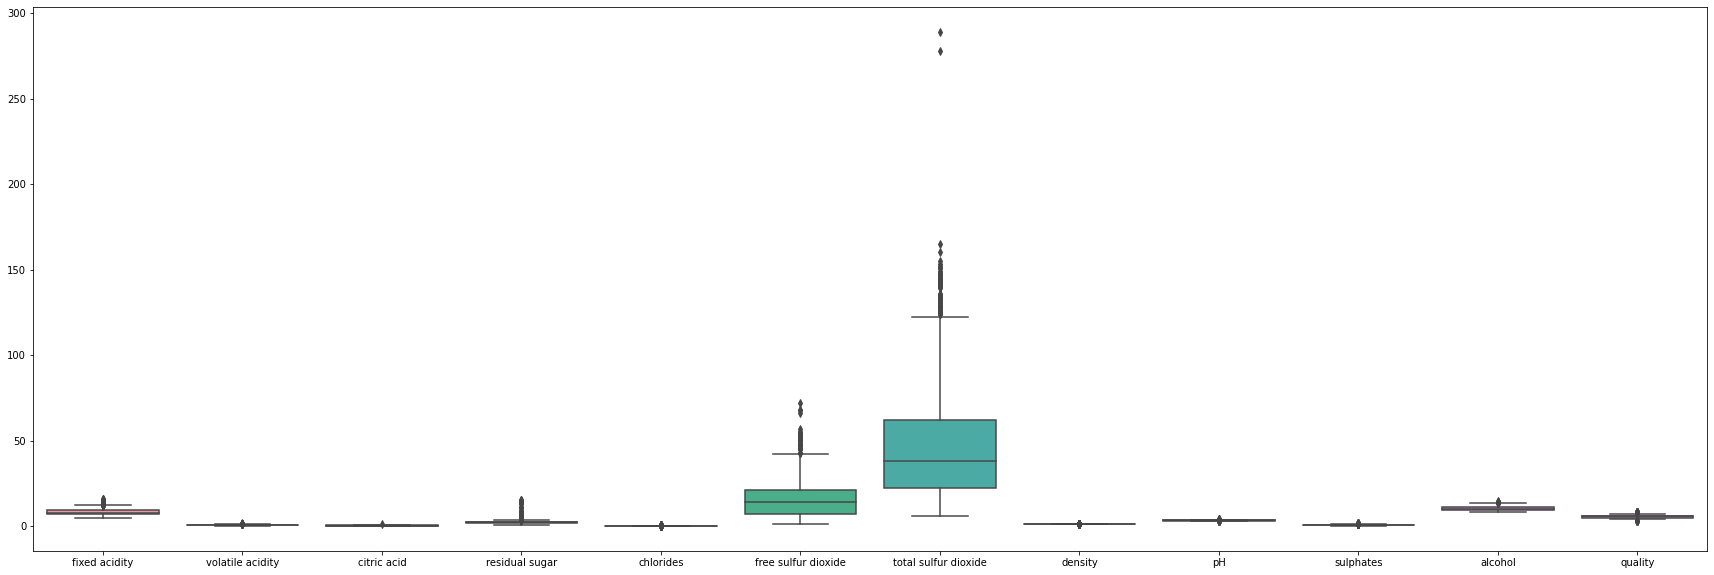

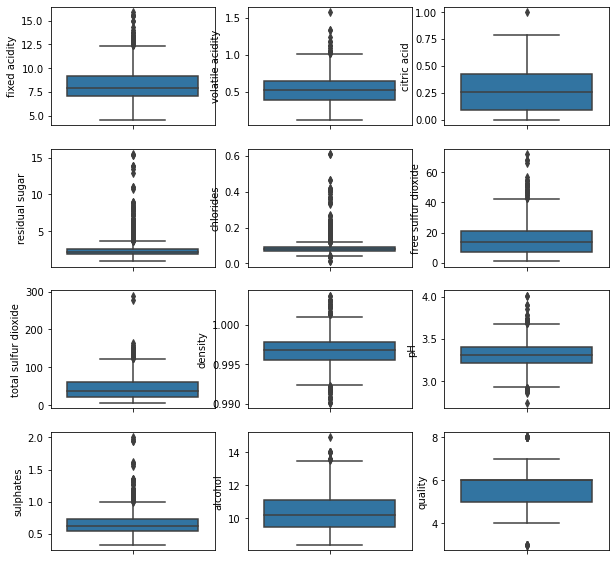

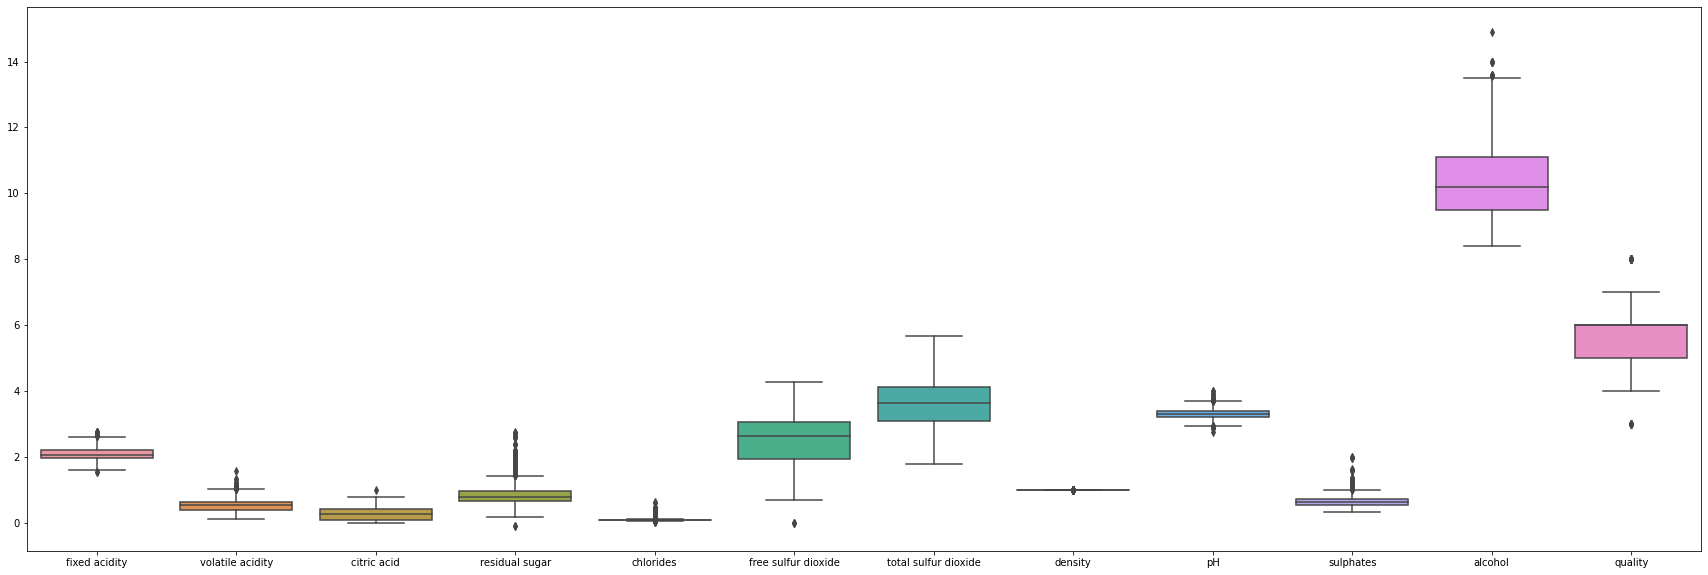

In [165]:
#Check for outliers
fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(30, 10)
sn.boxplot(data=wine,orient="v")

colnames = wine.columns
fig, axes = plt.subplots(nrows=4,ncols=3)
fig.set_size_inches(10, 10)
for i in range(4):
    for j in range(3):
        index = i*3 + j
        sn.boxplot(data=wine,y=colnames[index],orient="v",ax=axes[i, j])
        
#handle outliers in fixed acidity, free residual sugar, sulfur dioxide, total sulfur dioxide
wine_trans = wine.copy(deep = True)
wine_trans['residual sugar'] = np.log(wine['residual sugar'])
wine_trans['free sulfur dioxide'] = np.log(wine['free sulfur dioxide'])
wine_trans['total sulfur dioxide'] = np.log(wine['total sulfur dioxide'])
wine_trans['fixed acidity'] = np.log(wine['fixed acidity'])

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(30, 10)
sn.boxplot(data=wine_trans,orient="v")

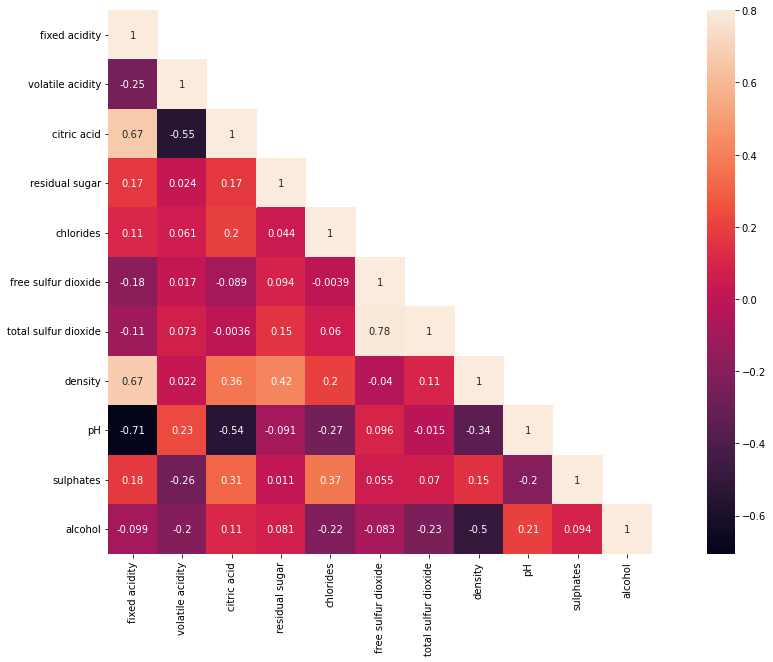

In [294]:
# Correlation analasys
corrMatt = wine_trans.loc[:, wine.columns != 'quality'].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

From the boxplot we see the distribution of wine quality is balanced with few outliers. From the histogram we see the distribution is similar to that of a normal distribution, indicating the normality assumption is not violated.

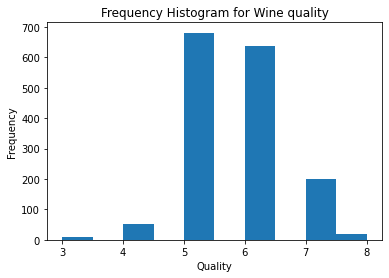

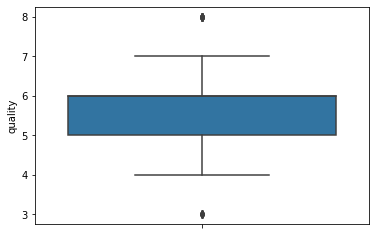

In [293]:
#Check distribution of wine quality
plt.hist(wine_trans.quality)
plt.gca().set(title='Frequency Histogram for Wine quality',
              ylabel='Frequency', xlabel = "Quality")
plt.show()

sn.boxplot(data=wine, y="quality", orient="v")
plt.show()

We also convert the dataframe into matrix, and conduct a 70:30 train:validation split.

In [184]:
#train validation split
wine_trans.quality.astype('category')
data = np.array(wine_trans)
x_train, x_val, y_train, y_val = train_test_split(data[:, :-1], data[:, -1], test_size=0.3, random_state=0)

### Modeling

# Linear Regression
First we view wine quality as a continuous variable, and conduct a linear regression analysis. There are no hyperparameters.

In [304]:
lin = LinearRegression().fit(x_train, y_train)

# Logistic Regression
We can also view wine quality as ordinal categorical variables and conduct a logsitic regression analysis. We further split the training data, and use them to tune hyperparameters. Using a part of traing set to perform grid search, we determine that the top three best-performing hyperparameter is C = 1, 10, 100.

In [197]:
#further split
x_train1, x_train2, y_train1, y_train2 = train_test_split(data[:, :-1], data[:, -1], test_size=0.3, random_state=0)

#define function to print the grid search results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

#grid search on logistic regression 
lr = LogisticRegression(max_iter=10000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(x_train1, y_train1.ravel())

#print resuts of grid search
print_results(cv)

BEST PARAMS: {'C': 10}

0.516 (+/-0.048) for {'C': 0.001}
0.535 (+/-0.048) for {'C': 0.01}
0.568 (+/-0.038) for {'C': 0.1}
0.577 (+/-0.057) for {'C': 1}
0.582 (+/-0.048) for {'C': 10}
0.574 (+/-0.053) for {'C': 100}
0.575 (+/-0.047) for {'C': 1000}


Then, based on the results for the validation set, we finally determine that the best-performing hyperparameter is C = 100. (Note that here wine quality is unbalanced here, so we use "micro" argument when calculating precision.)

In [198]:
#define function to print accuracy, precision, recall and latency given model and data
def eval_model(mdl, x, y, hyper_params):
    start = time.time()
    y_pred = mdl.predict(x)
    end = time.time()
    latency = round(end - start, 10)
    accuracy = round(metrics.accuracy_score(y.ravel(), y_pred), 3)
    #since there is little evidence for imbalanced sampling, we use argument macro
    precision = round(metrics.precision_score(y.ravel(), y_pred, average='micro'), 3)
    recall = round(metrics.recall_score(y.ravel(), y_pred, average='macro'), 3)
    print('Inverse of regularization strength {} -- A: {} / P: {} / R: {}/ L: {} ms'.format(hyper_params, 
                                                                                               accuracy, 
                                                                                               precision, 
                                                                                               recall, 
                                                                                               latency))

lr1 = LogisticRegression(max_iter=10000, C = 1)
lr1.fit(x_train1, y_train1.ravel())

lr2 = LogisticRegression(max_iter=10000, C = 10)
lr2.fit(x_train1, y_train1.ravel())

lr3 = LogisticRegression(max_iter=10000, C = 100)
lr3.fit(x_train1, y_train1.ravel())

Cs = ["C = 1", "C = 10", "C = 100"]

i = 0
for mdl in [lr1, lr2, lr3]:
    eval_model(mdl, x_train2, y_train2, Cs[i])
    i = i + 1

Inverse of regularization strength C = 1 -- A: 0.629 / P: 0.629 / R: 0.287/ L: 0.0 ms
Inverse of regularization strength C = 10 -- A: 0.623 / P: 0.623 / R: 0.291/ L: 0.0 ms
Inverse of regularization strength C = 100 -- A: 0.627 / P: 0.627 / R: 0.292/ L: 0.0 ms


# Neural Network

Using a two-layer neural network, our validation accuracy after 20 iterations is 26.88%

In [300]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(11,)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=60, epochs=20, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
19/19 [==============================] - 1s 14ms/step - loss: 30.7899 - accuracy: 0.0241 - val_loss: 30.1265 - val_accuracy: 0.1688
Epoch 2/20
19/19 [==============================] - 0s 4ms/step - loss: 30.7721 - accuracy: 0.2592 - val_loss: 30.1192 - val_accuracy: 0.3000
Epoch 3/20
19/19 [==============================] - 0s 4ms/step - loss: 30.7671 - accuracy: 0.3056 - val_loss: 30.1162 - val_accuracy: 0.3021
Epoch 4/20
19/19 [==============================] - 0s 4ms/step - loss: 30.7648 - accuracy: 0.3003 - val_loss: 30.1145 - val_accuracy: 0.3042
Epoch 5/20
19/19 [==============================] - 0s 3ms/step - loss: 30.7634 - accuracy: 0.2976 - val_loss: 30.1134 - val_accuracy: 0.3042
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 30.7625 - accuracy: 0.3003 - val_loss: 30.1126 - val_accuracy: 0.3000
Epoch 7/20
19/19 [==============================] - 0s 4ms/step - loss: 30.7619 - accuracy: 0.2958 - val_loss: 30.1121 - val_accuracy: 0.2937
Epoch

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

# Evaluate regression models

Based on the metrics reported below, we see the MAE and R-squared of linear regression model is higher than that of a logistic regression model.

In [308]:
#linear regression
lin_y_pred = lin.predict(x_val)

print('Linear Regression: MAE: {} / RMSE: {} / R-squared: {}'.format(metrics.mean_absolute_error(y_val, lin_y_pred),
                                                                     np.sqrt(metrics.mean_squared_error(y_val, lin_y_pred)),
                                                                     metrics.r2_score(y_val, lin_y_pred)))

#accuracy for linear regression
print(metrics.accuracy_score(y_val, lin_y_pred.astype(int)))

#logistic regression
lr_y_pred = lr1.predict(x_val)

print('Logistic Regression: MAE: {} / RMSE: {} / R-squared: {}'.format(metrics.mean_absolute_error(y_val, lr_y_pred),
                                                                       np.sqrt(metrics.mean_squared_error(y_val, lr_y_pred)),
                                                                       metrics.r2_score(y_val, lr_y_pred)))

#accuracy for linear regression
print(metrics.accuracy_score(y_val, lr_y_pred.astype(int)))

Linear Regression: MAE: 0.48639302494657527 / RMSE: 0.6308406838818059 / R-squared: 0.3254915789144668
0.53125
Logistic Regression: MAE: 0.4041666666666667 / RMSE: 0.68617296167463 / R-squared: 0.20197740112994345
0.6291666666666667


Based on the graph below, the five features that has highst importance scores for linear regression model are density, chlorides, volatile acidity, sulphates and fixed acidity.
Based on the graph below, the five features that has highst importance scores for logistic regression model are volatile acidity, sulfur dioxide, pH, citric acid and alcohol.

Feature: 0, Score: 0.41066
Feature: 1, Score: -1.25963
Feature: 2, Score: -0.19856
Feature: 3, Score: 0.07674
Feature: 4, Score: -1.69936
Feature: 5, Score: 0.07190
Feature: 6, Score: -0.13853
Feature: 7, Score: -25.18977
Feature: 8, Score: -0.23497
Feature: 9, Score: 0.85751
Feature: 10, Score: 0.26272


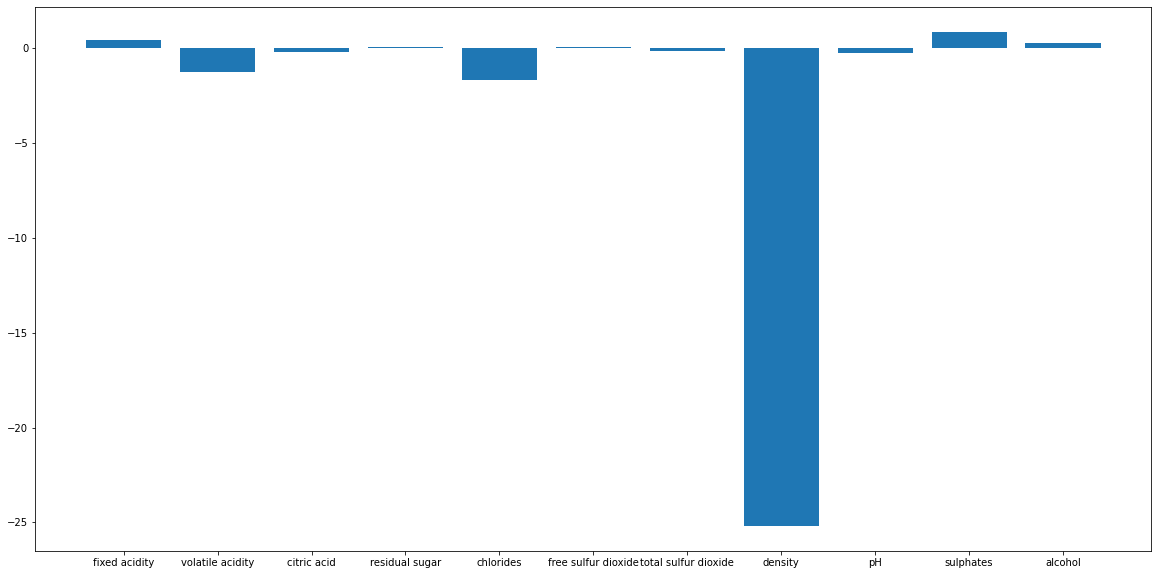

Feature: 0, Score: 0.00955
Feature: 1, Score: 2.09655
Feature: 2, Score: -0.62396
Feature: 3, Score: -0.14195
Feature: 4, Score: 0.26930
Feature: 5, Score: 0.32553
Feature: 6, Score: -0.93266
Feature: 7, Score: 0.01971
Feature: 8, Score: 0.62027
Feature: 9, Score: -0.30532
Feature: 10, Score: -0.45721


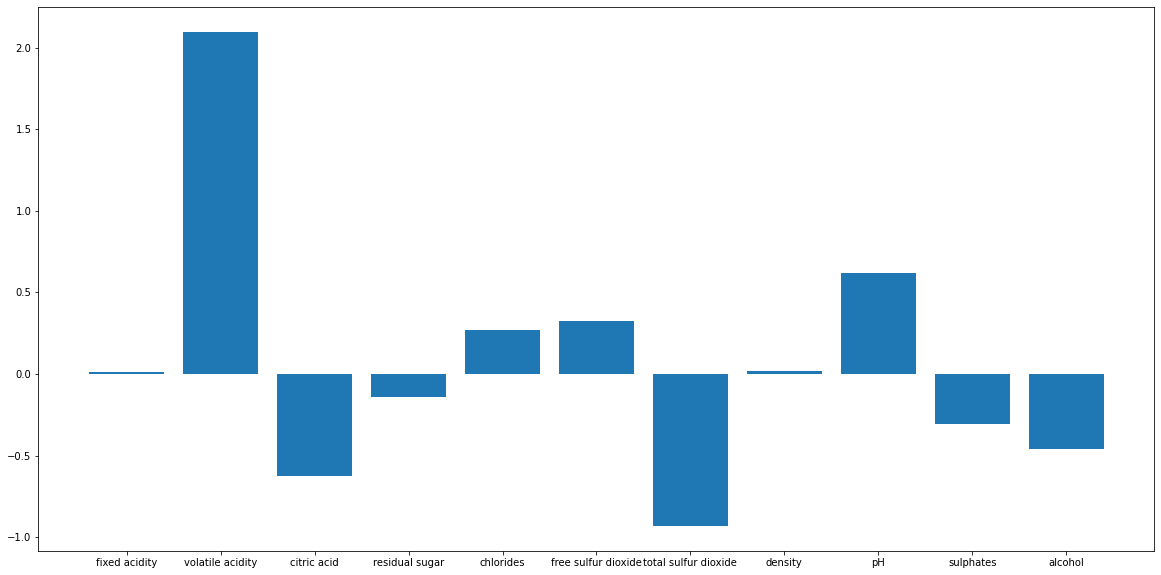

In [301]:
#linear regression
lin_importance = lin.coef_
for i,v in enumerate(lin_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(lin_importance))], lin_importance)
ax1 = plt.subplot()
ax1.set_xticks(np.arange(len(lin_importance)))
ax1.set_xticklabels(colnames[:-1]) 
plt.show()

#logistic regression
lr_importance = lr1.coef_[0]
for i,v in enumerate(lr_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(lr_importance))], lr_importance)
ax1 = plt.subplot()
ax1.set_xticks(np.arange(len(lr_importance)))
ax1.set_xticklabels(colnames[:-1]) 
plt.show()


# Evaluate Neural Network

The accuracy of validation data is 26.88%.

In [302]:
model.evaluate(x_val, y_val)

15/15 [==============================] - 0s 3ms/step - loss: 30.1112 - accuracy: 0.2688


[30.111181259155273, 0.26875001192092896]

### Conclusion

To conclude, logistic regression has the best performance with accuracy of 62%, while linear regression has a slightly poor performance of 53%. The accuracy of neural network  is 26%.
Based on the results of logsitic regression, the factors that affect wine quality most are volatile acidity, sulfur dioxide, pH, citric acid and alcohol. pH and valatile acidity has a positive affect on wine quality, while the rest has a negative affect.